# The frequency domain

Last time, we explored a basic proportional controller in the time domain. While this was somewhat intuitive, the time domain can be quite restrictive in many cases. As such, we often use the frequency domain for simple controller analysis. To convert from the time domain (using $t$) to the frequency domain (using $s$), we use the Laplace transform.

## The Laplace transform

The Laplace transform initially looks quite scary, but for applications in control systems we use a very basic form of it. The standard definition of the Laplace transform is

$$ F\left(s\right) = L\left( f\left(t\right)\right)\left(s\right) = \int_0^\infty f\left(t\right)e^{-st}\ dt \text{,} $$

with the inverse Laplace transform being defined as

$$ f\left(t\right) = L^{-1}\left( F\left(s\right)\right)\left(t\right) = \frac{1}{2\pi j} \int_{\sigma-j\infty}^{\sigma+j\infty} F\left(s\right) e^{st}\ ds \text{.} $$

While this can be very difficult to calculate due to the generality of it, the applications explored in these tutorials use a very simple form:

| Function in time domain | Function in frequency domain |
| :---------------------- | :--------------------------- |
| $$y(t)$$ | $$Y(s)$$ |
| $$y'(t)$$ | $$sY(s) - y(0^+)$$ |
| $$y''(t)$$ | $$s^2Y(s) - sy(0^+) - y'(0^+)$$ |
| $$\vdots$$ | $$\vdots$$ |
| $$y^n(t)$$ | $$s^nY\left(s\right) - \sum_{k=1}^n s^{n-k} y^{\left(k-1\right)} \left(0^+\right)$$ |

However, we can often simplify even further! We often start systems from rest at their zero position. As such, all initial conditions (such as $y\left(0\right)$) can be removed from these equations. Therefore, for a system starting at rest from a zero position,

| Function in time domain | Function in frequency domain |
| :---------------------- | :--------------------------- |
| $$y(t)$$ | $$Y(s)$$ |
| $$y'(t)$$ | $$sY(s)$$ |
| $$y''(t)$$ | $$s^2Y(s)$$ |
| $$\vdots$$ | $$\vdots$$ |
| $$y^n(t)$$ | $$s^nY\left(s\right)$$ |

In addition, Laplace transforms for some common functions are

| $$f\left(t\right)$$ | $$F\left(s\right)$$ |
|--|--|
| Heaviside function $u\left(t\right)$ | $$\frac{1}{s}$$ |
| $$e^{-\alpha t}$$ | $$\frac{1}{s+\alpha}$$ |
| $$\sin\left(\omega t\right)$$ | $$\frac{\omega}{s^2+\omega^2}$$ |
| $$\cos\left(\omega t\right)$$ | $$\frac{s}{s^2+\omega^2}$$ |
| $$Ae^{-\alpha t}\sin\left(\omega t\right)$$ | $$\frac{A\omega}{\left(s+\alpha\right)^2+\omega^2}$$ |
| $$Ae^{-\alpha t}\cos\left(\omega t\right)$$ | $$\frac{A\left(s+\alpha\right)}{\left(s+\alpha\right)^2+\omega^2}$$ |

### A short example

Consider some mass-spring-damper system governed by the ordinary differential equation

$$ y''\left(t\right) + 4y'\left(t\right) + 20y\left(t\right) = 0 \text{,} $$

with an initial position of $y\left(0\right) = 1$.

We can then take the Laplace transform, manipulating a differential equation into a far more simple polynomial in $s$. Assuming the initial velocity is zero, we obtain

$$ \left[s^2Y\left(s\right) - sy\left(0\right) - y'\left(0\right)\right] + \left[4sY\left(s\right) - 4y\left(0\right)\right] + \left[20Y\left(s\right)\right] = 0 \text{.} $$

Thus,

$$ Y\left(s\right) \left(s^2 + 4s + 20\right) = s+4 \text{.} $$

Dividing both sides by the quadratic gives

$$ Y\left(s\right) = \frac{s+4}{s^2+4s+20} \text{.} $$

Let's complete the square of the denominator. We notice that $s^2+4s+20 = \left(s+2\right)^2 + 16 = \left(s+2\right)^2+4^2$. Therefore,

$$ Y\left(s\right) = \frac{s+4}{\left(s+2\right)^2 + 4^2} \text{.} $$

We notice that we almost have this fraction in the final expression in the Laplace transforms for common functions table above. Let's split the numerator into $\left(s+2\right)+2$ and do a little manipulation to form two separate fractions:

$$ Y\left(s\right) = \frac{s+2}{\left(s+2\right)^2 + 4^2} + \frac{1}{2} \frac{4}{\left(s+2\right)^2 + 4^2} \text{.} $$

Now we have two fractions, each of which correlate to the final two Laplace transforms in the table above. With this form, we can easily perform the inverse Laplace transform, yielding

$$ y\left(t\right) = e^{-2t}\cos\left(4t\right) + \frac{1}{2}e^{-2t}\sin\left(4t\right) \text{.} $$

To verify this is correct, we can simply differentiate it twice and substitute it into our initial equation to check it satisfies the ODE:

$$ y'\left(t\right) = -2e^{-2t}\cos\left(4t\right) - 4e^{-2t}\sin\left(4t\right) - e^{-2t}\sin\left(4t\right) + 2e^{-2t}\cos\left(4t\right) $$

$$ \implies y'\left(t\right) = -5e^{-2t}\sin\left(4t\right) \text{, and} $$

$$ y''\left(t\right) = 10e^{-2t}\sin\left(4t\right) - 20e^{-2t}\cos\left(4t\right) \text{.} $$

Substituting these expressions into the ODE yields

$$ y''\left(t\right) + 4y'\left(t\right) + 20y\left(t\right) = \left[ 10e^{-2t}\sin\left(4t\right) - 20e^{-2t}\cos\left(4t\right) \right] + 4\left[ -5e^{-2t}\sin\left(4t\right) \right] + 20\left[ e^{-2t}\cos\left(4t\right) + \frac{1}{2}e^{-2t}\sin\left(4t\right) \right] $$

$$ \implies y''\left(t\right) + 4y'\left(t\right) + 20y\left(t\right) = 0 $$

as required. In addition, we should check the initial conditions:

$$ y\left(0\right) = e^{-2\times 0}\cos\left(4\times 0\right) + \frac{1}{2}e^{-2\times 0}\sin\left(4\times 0\right) = 1 \text{, and} $$

$$ y'\left(0\right) = -5e^{-2 \times 0}\sin\left(4 \times 0\right) = 0 \text{.} $$

Thus we've satisfied our ODE and initial conditions with our solution and have solved an ODE by using a polynomial rather than traditional methods. Let's now simulate this system to check our solution:

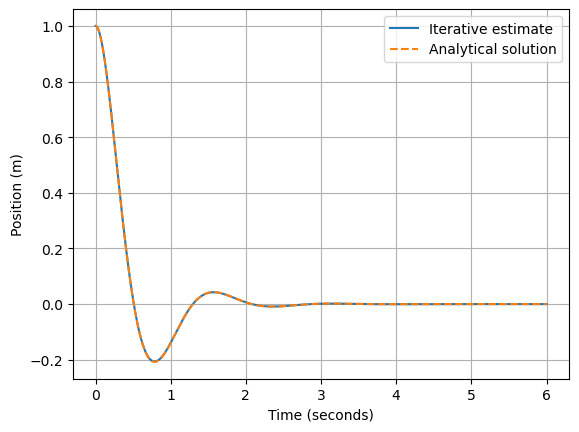

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a time array
dt = 0.001
t = np.arange(0,6,dt)

# Simulate dynamic system with approximations for derivatives
yest = np.zeros(np.size(t)+1)
yest[0] = 1 # Initial position
ydest = np.zeros(np.size(t)+1)
yddest = np.zeros(np.size(t)+1)
yddest[0] = -20 # We know initial pos and vel and can sub these into ODE to obtain initial accel
for i in range(np.size(t)-1):
    yest[i+1] = yest[i] + ydest[i]*dt + 0.5*yddest[i]*dt*dt # Estimate each time step pos as a const accel quadratic
    yddest[i+1] = -4*ydest[i] - 20*yest[i+1] # Estimate each accel based on ODE
    ydest[i+1] = ydest[i] + yddest[i+1]*dt # Estimate each vel based on current and most recent accels
    
# Now set up the analytical solution
y = np.exp(-2*t)*np.cos(4*t) + 0.5*np.exp(-2*t)*np.sin(4*t)

plt.plot(t,yest[:np.size(t)],t,y[:np.size(t)],'--')
plt.ylabel('Position (m)')
plt.xlabel('Time (seconds)')
plt.grid()
plt.legend(['Iterative estimate','Analytical solution'])

As we can see, the analytical estimate matches almost perfectly with the estimation from the ODE. Additionally, we can get an intuitive feeling for what is happening: We are starting a mass-spring-damper system from a position of unity and letting it go. We can reasonably expect it to have some oscillation, as exhibited. It clearly also has considerable damping, as can be seen from the decay on the plot. Finally, the system comes to rest at zero, as expected with this system.

## Conclusion
This lesson, we have introduced the Laplace transform and used it to analytically solve an ODE without using standard methods. While standard methods are often fine to use, we will see the power of the frequency domain very soon when we begin studying transfer functions.